# GL22

In [8]:
from __future__ import print_function
import PyAstrOFit.Orbit as Orbit
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time
from PyAstrOFit.Toolbox import timeConverter
from astropy import units as u
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Instanciate an orbit object

In [3]:
par=1757.947 #parallax mas
asec= 510.26 #a [arcsec]
a = asec/(par*1.e-3)        #[A.U.]
e = 0.1576
i = 44.29       #[deg]
node = 176.75    #[deg]
w = 104.90      #[deg]
tp=57447.0 + 2400000.5
P = 15.4275 #[yr]
starDistance = 1/(par*1.e-3) #[pc]

In [4]:
target = Orbit(semiMajorAxis = a,
                   eccentricity = e,
                   inclinaison = i,
                   longitudeAscendingNode = node,
                   periastron = w,
                   periastronTime = tp,
                   dStar = starDistance,
                   period=P)

In [9]:
c1 = SkyCoord("00h32m29.4817s","+67d14m09.09s",frame='icrs')

def seppa2dradec(sep,PA):
    #sep mas, PA=deg
    PAu = PA * u.deg
    sepu = sep/3600*1.e-3 * u.deg
    print(c1.directional_offset_by(PAu,sepu))
    return c1.directional_offset_by(PAu,sepu)

#### Position at specific observation dates

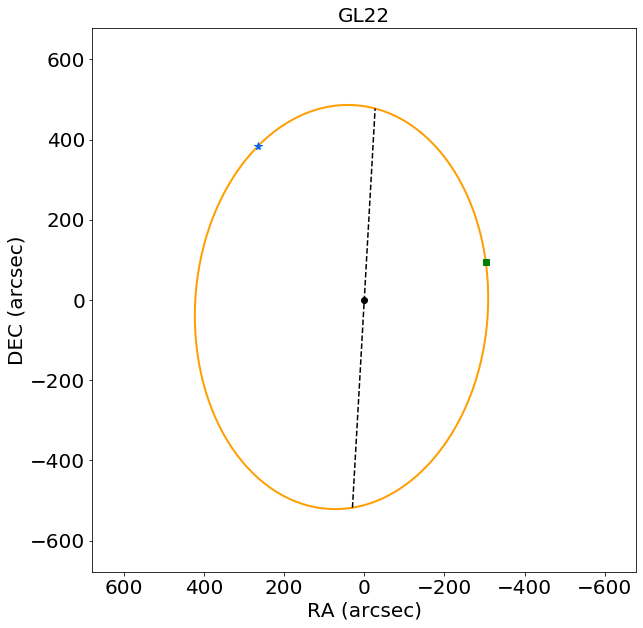

In [13]:
observation_dates=['2020-09-16 2:00:00']
target.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'GL22',20],
                   addPosition = observation_dates,
                 #addPoints = [[-0.2496636],[-0.0865443],[0.02],[0.02]],
                 addPosition_options={'marker':'*',
                                        'markerfacecolor':(0,0.38,1.),
                                        'markeredgecolor':(0,0.38,1.),
                                        'markersize':8},)

In [11]:
pos = timeConverter(time='2020-09-16 2:00:00')
ta1 = target.trueAnomaly(pos)
point = target.positionOnOrbit(ta1,"earth","arcsec")
coord1 = SkyCoord(0*u.arcsec, 0*u.arcsec, frame='icrs')
coord2 = SkyCoord(point['raPosition']*u.arcsec, point['decPosition']*u.arcsec, frame='icrs')

pa_pre = coord1.position_angle(coord2).to(u.deg)
sep_pre = coord1.separation(coord2).to(u.arcsec)

In [12]:
pa_pre,sep_pre

(<Angle 34.5667569 deg>, <Angle 466.43465195 arcsec>)